In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
data=pd.read_csv("NSEI.csv")

In [13]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-13,12296.700195,12337.750000,12285.799805,12329.549805,12329.549805,501000
1,2020-01-14,12333.099609,12374.250000,12308.700195,12362.299805,12362.299805,616300
2,2020-01-15,12349.400391,12355.150391,12278.750000,12343.299805,12343.299805,684400
3,2020-01-16,12347.099609,12389.049805,12315.799805,12355.500000,12355.500000,395700
4,2020-01-17,12328.400391,12385.450195,12321.400391,12352.349609,12352.349609,502100


In [45]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
95,2020-06-04,10054.250000,10123.849609,9944.250000,10029.099609,10029.099609,775100
96,2020-06-05,10093.799805,10177.799805,10040.750000,10142.150391,10142.150391,987100
97,2020-06-08,10326.750000,10328.500000,10120.250000,10167.450195,10167.450195,936500
98,2020-06-09,10181.150391,10291.150391,10021.450195,10046.650391,10046.650391,754200
99,2020-06-10,10072.599609,10148.750000,10036.849609,10116.150391,10116.150391,632400


In [16]:
data.shape

(100, 7)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       100 non-null    object 
 1   Open       100 non-null    float64
 2   High       100 non-null    float64
 3   Low        100 non-null    float64
 4   Close      100 non-null    float64
 5   Adj Close  100 non-null    float64
 6   Volume     100 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 5.6+ KB


In [19]:
df=data[['Adj Close']]
df.head()

,Adj Close
0,12329.549805
1,12362.299805
2,12343.299805
3,12355.500000
4,12352.349609


In [21]:
forecast_out=30
df['Prediction']=df[['Adj Close']].shift(-forecast_out)
print(df.tail())

       Adj Close  Prediction
95  10029.099609         NaN
96  10142.150391         NaN
97  10167.450195         NaN
98  10046.650391         NaN
99  10116.150391         NaN


C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
X=np.array(df.drop(['Prediction'],1))
X=X[:-forecast_out]
print(X)


[[12329.549805]
 [12362.299805]
 [12343.299805]
 [12355.5     ]
 [12352.349609]
 [12224.549805]
 [12169.849609]
 [12106.900391]
 [12180.349609]
 [12248.25    ]
 [12119.      ]
 [12055.799805]
 [12129.5     ]
 [12035.799805]
 [11962.099609]
 [11707.900391]
 [11979.650391]
 [12089.150391]
 [12137.950195]
 [12098.349609]
 [12031.5     ]
 [12107.900391]
 [12201.200195]
 [12174.650391]
 [12113.450195]
 [12045.799805]
 [11992.5     ]
 [12125.900391]
 [12080.849609]
 [11829.400391]
 [11797.900391]
 [11678.5     ]
 [11633.299805]
 [11201.75    ]
 [11132.75    ]
 [11303.299805]
 [11251.      ]
 [11269.      ]
 [10989.450195]
 [10451.450195]
 [10458.400391]
 [ 9590.150391]
 [ 9955.200195]
 [ 9197.400391]
 [ 8967.049805]
 [ 8468.799805]
 [ 8263.450195]
 [ 8745.450195]
 [ 7610.25    ]
 [ 7801.049805]
 [ 8317.849609]
 [ 8641.450195]
 [ 8660.25    ]
 [ 8281.099609]
 [ 8597.75    ]
 [ 8253.799805]
 [ 8083.799805]
 [ 8792.200195]
 [ 8748.75    ]
 [ 9111.900391]
 [ 8993.849609]
 [ 8925.299805]
 [ 8992.

In [23]:
Y=np.array(df['Prediction'])
Y = Y[:-forecast_out]
Y

array([11797.900391, 11678.5     , 11633.299805, 11201.75    ,
       11132.75    , 11303.299805, 11251.      , 11269.      ,
       10989.450195, 10451.450195, 10458.400391,  9590.150391,
        9955.200195,  9197.400391,  8967.049805,  8468.799805,
        8263.450195,  8745.450195,  7610.25    ,  7801.049805,
        8317.849609,  8641.450195,  8660.25    ,  8281.099609,
        8597.75    ,  8253.799805,  8083.799805,  8792.200195,
        8748.75    ,  9111.900391,  8993.849609,  8925.299805,
        8992.799805,  9266.75    ,  9261.849609,  8981.450195,
        9187.299805,  9313.900391,  9154.400391,  9282.299805,
        9380.900391,  9553.349609,  9859.900391,  9293.5     ,
        9205.599609,  9270.900391,  9199.049805,  9251.5     ,
        9239.200195,  9196.549805,  9383.549805,  9142.75    ,
        9136.849609,  8823.25    ,  8879.099609,  9066.549805,
        9106.25    ,  9039.25    ,  9029.049805,  9314.950195,
        9490.099609,  9580.299805,  9826.150391,  9979.

In [105]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=1)

In [106]:
X_train_scaled = scaler.fit_transform(X_train)
X_train1 = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test1 = pd.DataFrame(X_test_scaled)

# SVR

In [107]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(X_train1, Y_train)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [108]:
svm_confidence=svr_rbf.score(X_test1,Y_test)
print("svm confidence: ", svm_confidence)


svm confidence:  -0.008870709536397126


# Linear Regression

In [126]:
from sklearn.linear_model import LinearRegression
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(X_test, Y_test)
print("lr confidence: ", lr_confidence)


lr confidence:  -0.02487146228566628


# GBR

In [133]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [134]:
clf.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [135]:
clf.score(X_train, Y_train)

0.9999999969171435

In [136]:
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)


[[ 9380.900391]
 [ 9553.349609]
 [ 9859.900391]
 [ 9293.5     ]
 [ 9205.599609]
 [ 9270.900391]
 [ 9199.049805]
 [ 9251.5     ]
 [ 9239.200195]
 [ 9196.549805]
 [ 9383.549805]
 [ 9142.75    ]
 [ 9136.849609]
 [ 8823.25    ]
 [ 8879.099609]
 [ 9066.549805]
 [ 9106.25    ]
 [ 9039.25    ]
 [ 9029.049805]
 [ 9314.950195]
 [ 9490.099609]
 [ 9580.299805]
 [ 9826.150391]
 [ 9979.099609]
 [10061.549805]
 [10029.099609]
 [10142.150391]
 [10167.450195]
 [10046.650391]
 [10116.150391]]


In [137]:
#SVR
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

#Linear Regression
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)


#GBR
clf_prediction=clf.predict(x_forecast)
print(clf_prediction)




[9173.35548472 9173.35548472 9173.35548472 9173.35548472 9173.35548472
 9173.35548472 9173.35548472 9173.35548472 9173.35548472 9173.35548472
 9173.35548472 9173.35548472 9173.35548472 9173.35548472 9173.35548472
 9173.35548472 9173.35548472 9173.35548472 9173.35548472 9173.35548472
 9173.35548472 9173.35548472 9173.35548472 9173.35548472 9173.35548472
 9173.35548472 9173.35548472 9173.35548472 9173.35548472 9173.35548472]
[9410.23605852 9420.99878539 9440.13092399 9404.78131336 9399.29536271
 9403.37084933 9398.88658294 9402.16005167 9401.39240863 9398.73055545
 9410.40141108 9395.37285622 9395.00460696 9375.43254407 9378.91817361
 9390.61712641 9393.09485499 9388.91331848 9388.27671419 9406.12004132
 9417.05129011 9422.68077388 9438.02455299 9447.57026551 9452.71606408
 9450.69081514 9457.74642666 9459.32541254 9451.78617687 9456.12374085]
[10167.34919217  9553.46518777  9859.81750675 10116.11448195
  9293.56030727  9979.18181172  9293.56030727 10061.46619525
 10061.46619525  9293.56

In [138]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train1 = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test1 = pd.DataFrame(X_test_scaled)

In [140]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    knn_model = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn_model.fit(X_train1, Y_train)  #fit the model
    pred=knn_model.predict(X_test1) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 721.1976800572993
RMSE value for k=  2 is: 424.7275738610798
RMSE value for k=  3 is: 527.111851429346
RMSE value for k=  4 is: 378.8158442339283
RMSE value for k=  5 is: 364.571210683397
RMSE value for k=  6 is: 371.6854970565618
RMSE value for k=  7 is: 408.38734051464763
RMSE value for k=  8 is: 428.03276883259576
RMSE value for k=  9 is: 458.5132838367244
RMSE value for k=  10 is: 466.0603197806513
RMSE value for k=  11 is: 534.8847894420883
RMSE value for k=  12 is: 542.4468694749328
RMSE value for k=  13 is: 540.5121842841036
RMSE value for k=  14 is: 575.9206951742707
RMSE value for k=  15 is: 584.1921945500615
RMSE value for k=  16 is: 594.0181541217556
RMSE value for k=  17 is: 616.8299293509476
RMSE value for k=  18 is: 641.4066955472719
RMSE value for k=  19 is: 646.9063175594143
RMSE value for k=  20 is: 677.1461929690732


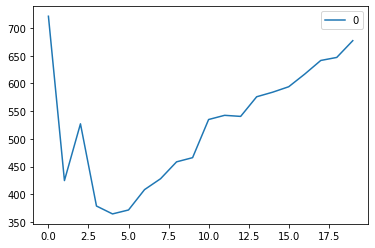

In [141]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [144]:
pred

array([9522.8774903 , 9245.1050293 , 9531.9700196 , 9483.209961  ,
       9496.0475586 , 9522.8774903 , 9460.85498055, 8947.8700196 ,
       9460.85498055, 9061.76752935, 9908.24506835, 9234.11000985,
       9460.85498055, 8947.8700196 ])

In [147]:
knn_model.score(X_train1, Y_train)

0.24573618337119166

# Cross Validation

In [149]:
train, validation = train_test_split(df, test_size=0.50, random_state = 5)

In [158]:
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np

In [159]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [160]:
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    best_svr.fit(X_train, Y_train)
    scores.append(best_svr.score(X_test, Y_test))

Train Index:  [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69] 

Test Index:  [0 1 2 3 4 5 6]
Train Index:  [ 0  1  2  3  4  5  6 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69] 

Test Index:  [ 7  8  9 10 11 12 13]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69] 

Test Index:  [14 15 16 17 18 19 20]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69] 

Test Index:  [21 22 23 24 25 26 27]
Train Index:  [ 0  1  2  3 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [163]:
best_svr.fit(X_train, Y_train)
scores.append(best_svr.score(X_test, Y_test))

In [164]:
print(np.mean(scores))

-45.54823861686014


In [170]:
from sklearn.model_selection import cross_val_score,cross_val_predict
cross_val_score(best_svr, X, Y, cv=10)

array([-8.26311383e+01, -2.52210510e+00, -4.60515958e+00, -1.06486239e+01,
       -1.71436355e+00,  1.08274633e-02, -3.22138415e-01, -1.04739201e+00,
       -1.10063145e-01, -1.98720234e+02])

In [172]:
cross_val_predict(best_svr, X, Y, cv=10)

array([9183.36538177, 9183.44183915, 9183.39621629, 9183.42511339,
       9183.41751413, 9183.19333499, 9183.15057766, 9183.25282214,
       9183.32473159, 9183.44471272, 9183.26037735, 9183.24015345,
       9183.26832334, 9183.24381848, 9269.21757572, 9268.89162055,
       9269.252003  , 9269.4931583 , 9269.61296917, 9269.51523588,
       9269.3608771 , 9269.62857722, 9269.92719268, 9269.84045555,
       9269.64579676, 9269.44187898, 9269.29187365, 9269.68470978,
       9268.66292039, 9268.67586271, 9268.70169758, 9268.85352363,
       9268.93388229, 9270.33362896, 9270.65428569, 9236.94301004,
       9237.21423367, 9237.11904398, 9238.7860056 , 9242.54128993,
       9242.49387142, 9246.30869869, 9208.24111167, 9208.56635602,
       9207.58368413, 9204.64793618, 9203.43644611, 9206.3486017 ,
       9200.903905  , 9266.9197869 , 9269.92760645, 9272.19191947,
       9272.31960615, 9269.67587681, 9271.89133462, 9269.49124293,
       9240.79661329, 9244.56543646, 9244.33467801, 9246.01577

### We got GBR as best model with the score of 99%